### Project 2: Test a Perceptual Phenomenon
#### Background Information

In a **Stroop** task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

##### 1. What is our independent variable? What is our dependent variable?

**Dependent Variable:**
The time it takes to name the ink colors in a predefined list consisting of words of color.

**Independent Variable:**
Conditioning of the words in the (predefined) list. Conditioning can be one of:
* _Congruent_ : word text matches with the color in which it is printed
* _Incongruent_: word text does not match with the color in which it is printed 

##### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

##### Problem Statement
In this experiment, the participants are provided with a word list in congruent condition and the word list in incongruent condition and asked to report the time taken by them to read each list separately. We are provided with two sample distributions- time taken by 24 participants for reading the congruent word list and the incongruent word list. We do not have the distribution of time taken or any statistical parameter in the population from which these samples are taken. 

We have to research if the congruent/incongruent condition influences the speed of reading the list in any significant way. i.e. Are the participants likely to report almost similar times for reading both the congruent and incongruent lists? Or are they likely to report more time for one of the lists compared to the other? Or the time taken is not inluenced by the conditioning of the words?

##### Assumptions
Other factors such as age, fluency in language, color blindness etc., that could potentially influence the readings in either set are not taken into account or considered not relevant for the purpose of this exercise.

##### Approach
This is basically a "repeated measures" / "within subject design" involving two conditions where we have two sample sets of data points, one for each condition. As we do not have the population parameters for mean and standard deviation, we shall use the _t distribution model_ to compare the sample statistics. We take the difference in score for each participant and reduce it to a $t_{statistic}$. We then analyze this $t_{statistic}$ with a significance level of $\alpha = .05$ to arrive at a decision as to the statistical significance of the observed sample differences.

As is the convention, we shall postulate that the participants do not report significant difference in time taken to read through the lists. This shall be our **null hypothesis $H_{null}$**. There are choices for  the  **alternate hypothesis $H_{alt}$**. It can be one of the following:
- time taken for incongruent list is more than that of the congruent list
- time taken for the incongruent list is less than that for the congruent list
- the time for the congruent list could be either more than or less than that for incongruent list but just not the same

The specific alternate hypothesis chosen influences what kind of statistical test needs to be performed. A cursory analysis of the available sample data reveals that the time reported for incongruent list is almost always more than that of the congruent list. The mean for incongruent list $$\bar x_{incongruent} = 22.02$$ is more than the mean for the congruent list $$\bar x_{congruent} = 14.05$$. In my personal experience, reading through the incongruent list always took more time than the congruent list. This appears to intuitively make sense as incongruent list involves two conflicting signals - color & text differing from each other - and hence more processing is required by the brain. Therefore we shall adopt the first alternate hypothesis in the list above i.e. time taken for incongruent list is more than that of the congruent list which leads to One-Tailed Test in the positive direction.

We shall also estimate the range of differences in time taken for the two conditions with a confidence level of 95%.

We use Pandas library to read in the samples data in csv format and calculate sample statistics. All calculations are rounded to the nearest 2 decimal places for readability purposes.

##### Notations & Mathematical Formulation
Sample Size $$n = 24$$

Degrees of Freedom $$df = (n - 1)$$ $$= (24 - 1)$$ $$= 23$$

Mean of Sample Differences $$\bar x_{diff} = 7.96$$

Standard Deviation of Sample Differences (With Bessel's correction): $$S_{diff} = 4.86$$

$\alpha = .05$, One-Tailed Test in the positive direction

$\mu_{congruent}$: Population mean for the time taken to name the colors in the congruent word list

$\mu_{incongruent}$: Population mean for the time taken to name the colors in the incongruent word list

$\mu_{diff} = \mu_{incongruent} - \mu_{congruent}$

$H_{null}: \mu_{diff} = 0$ (congruent or incongruent word conditions do not affect time taken to read the word list)

$H_{alt}: \mu_{diff} \gt 0$ (incongruent word conditions lead to longer time to read the word list)

The questions to tackle are if $H_{null}$ holds true at the stipulated significance level of .05 in the positive direction and the range for mean difference at 95% confidence level. 


##### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [66]:
## import all necessary packages and functions.
import csv # read and write csv files
import pprint # use to print data structures like dictionaries in
                      # a nicer way than the base print function.
import math
import numpy as np
import pandas as pd
from prettytable import PrettyTable
%matplotlib inline
import matplotlib.pyplot as plt

In [67]:
datafile = './Stroop-Test-Samples.csv'
df = pd.read_csv(datafile, index_col=False)
cong_mean = df.Congruent.mean()
incong_mean = df.Incongruent.mean()

# While calculating std, Pandas normalizes using N-1 by default. (Bessel's correction)
cong_sdev = df.Congruent.std()
incong_sdev = df.Incongruent.std()

diff_data = df.Incongruent - df.Congruent 
diff_mean = diff_data.mean()
diff_sdev = diff_data.std()

x = PrettyTable()
x.field_names = ["Statistic", "Congruent", "Incongruent", "Difference (Incong - Cong)"]
x.align["Statistic"] = "l"
x.add_row (["Mean", round(cong_mean, 2), round(incong_mean, 2), round(diff_mean, 2)])
x.add_row(["Std. Dev.", round(cong_sdev, 2), round(incong_sdev, 2), round(diff_sdev, 2)])
print(x)

+-----------+-----------+-------------+----------------------------+
| Statistic | Congruent | Incongruent | Difference (Incong - Cong) |
+-----------+-----------+-------------+----------------------------+
| Mean      |   14.05   |    22.02    |            7.96            |
| Std. Dev. |    3.56   |     4.8     |            4.86            |
+-----------+-----------+-------------+----------------------------+


$\bar x_{congruent} = 14.05$ (Mean of time taken to read word list in congruent condition)

$\bar x_{incongruent} = 22.02$ (Mean of time taken to read word list in incongruent condition)

$\bar S_{congruent} = 3.56$ (Std Dev of time taken to read word list in congruent condition)

$\bar S_{incongruent} = 4.08$ (Std Dev of time taken to read word list in incongruent condition)

$\bar x_{diff} = 7.96$ (Mean of differences in time taken)

$\bar S_{congruent} = 4.86$ (Std Dev of differences in time taken)

##### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

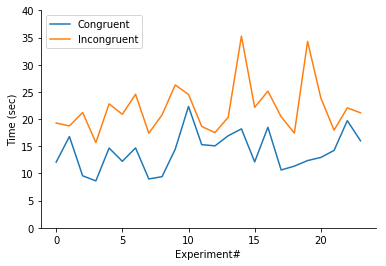

In [68]:

plt.plot(df.Congruent, label="Congruent")
plt.plot(df.Incongruent, label="Incongruent")

# making the top and right spine invisible
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.legend(loc="upper left")
plt.ylabel('Time (sec)')
plt.xlabel('Experiment#')
plt.yticks(range(0,45,5))

plt.show()

We can infer from the plot of congruent and incongruent times above that the plot of incongruent times
- never intersects with that of congruent times.
- is laid above the plot of congruent time
Therefore we are vindicated in our approach to use One-tailed t-Test in the positive direction.

Also, the two plots almost have the same shape excepting for the magnitude. Hence unknown lurking variable(s) may not have influenced the results.

##### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?


##### Calculations
Sample Size $$n = 24$$

Degrees of Freedom $$df = (n - 1)$$ $$= (24 - 1)$$ $$= 23$$

Mean of Sample Differences $$\bar x_{diff} = 7.96$$

Standard Deviation of Sample Differences (With Bessel correction): $$S_{diff} = 4.86$$

For chosen $\alpha = .05$ & given degrees of freedom is $df = 23$, $t_{critical}$ value for doing one-tailed test is obtained from t distribution table $$t_{critical} = 1.714$$ 

Standard Error of Mean Differences $SE_{diff}$ is calculated using the forumla $$SE_{diff} = \frac{S_{diff}}{\sqrt{n}}$$ $$= \frac{4.86}{\sqrt{24}}$$ $$= 0.99$$

$t_{statistic}$ is calculated as below $$t_{statistic} = \frac {\bar x_{diff} - \bar \mu _{diff}} {SE_{diff}}$$ $$=\frac {7.96 - 0} {0.99}$$ $$= 8.04$$

Since $t_{statistic}$ is far greater than $t_{critical}$, we can conclude that the difference sample at hand lies in the critical region where only 5% of values reside. P-value obtained from the online calculator $P = .0002$ is considered to be _extremely statistically significant_. Hence we  **reject the null hypothesis $H_{null}$** i.e., the mean differences in samples for congruent word list and incongruent word list could not be accounted by mere chance alone and there is 95% probability those two sample sets belong to different population groups where the mean for the incongruent group is bigger than the mean for the congruent group .


**95% Confidence Interval for the Mean Difference**
To calculate the confidence interval (CI) for the difference in mean time between incongruent and congruent conditions, we calculate the margin of error (ME) first using the formula $ME = t_{critical} * SE_{diff}$. However, the $t_{critical}$ should now be obtained for $\alpha = .05$ for $two-tailed$ t distribution which turns out to be $t_{critical} =  2.0687$ for $df = 23$. Therefore $$ME = t_{critical} * SE_{diff}$$ $$ = 2.0687 / 0.99$$ $$= 2.09$$

CI is calculated using ($\bar x_{diff} \pm ME$) which translates to $7.96 \pm 2.09$ i.e., $(5.87, 10.05)$.

##### Observations: 
$t(23) = 8.04$, $P = .0002$, one-tailed in +ve direction 

$\implies$ Reject $H_{null}$

95% CI: $(5.87, 10.05)$ (for mean difference)

##### Conclusion
Rounding off to the nearest integer, we can say that **95% of users are likely to take 6 sec to 10 sec more time for a reading a list of words with incogruent condition** compared to the time for reading the same list of words but in congruent condition. The result is on expected lines based on my own personal experience of consistently clocking more time to read the list of incongruent words as well as the intuition that it is likely that the brain takes more time to process two  signals that are conflicting (text and color in the present scenario) than if the signals are not conflicting with each other.

###### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

##### What is responsible for the effect observed

It is likely that the brain takes more time to process two  signals that are conflicting (text and color in the present scenario) than if the signals are not conflicting with each other. Here is an extract from [NeuroScience for Kids](https://faculty.washington.edu/chudler/words.html#seffect)
>The interference between the different information (what the words say and the color of the words) your brain receives causes a problem.  There are two theories that are proposed to explain the Stroop effect:

>Speed of Processing Theory: the interference occurs because words are read faster than colors are named. Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words.

##### Other tasks that would result in a similar effect
The url given above lists a few other tasks with similar effect. We could also design the same task replacing text with auditory input and check if the same interference problem happens between auditory and color signals as well.